In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
from rdkit.Chem import Draw

### 1. Molecular fingerprint of test compound

In [2]:
df_nps=pd.read_csv('Natural Products.csv')
database_nps=[]
for i in range(len(df_nps)):
    smiles=df_nps['Smiles'][i]
    name=df_nps['Name'][i]
    mol=Chem.MolFromSmiles(smiles)
    mol.SetProp('Name',name)
    database_nps.append(mol)

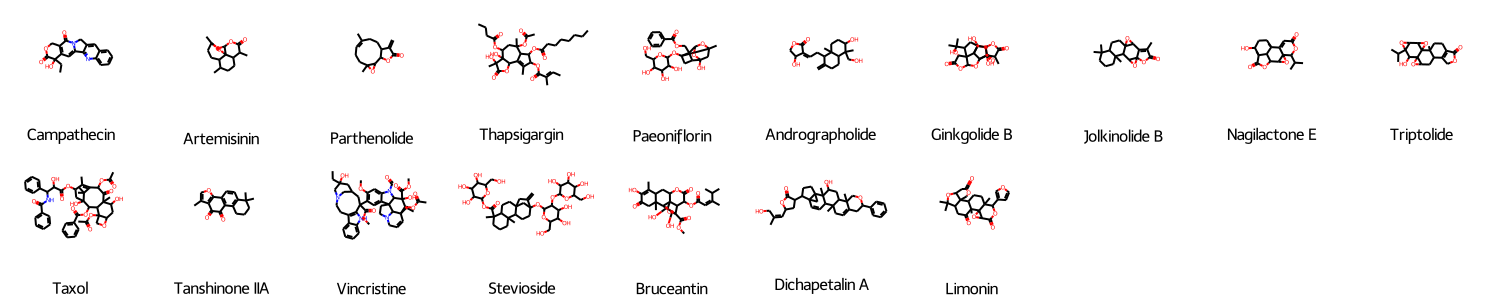

In [3]:
Draw.MolsToGridImage(database_nps,molsPerRow=10,subImgSize=(150,150),legends=[mol.GetProp('Name') for mol in database_nps])

In [4]:
fps_nps=[FingerprintMols.FingerprintMol(mol) for mol in database_nps]

### 2. Molecular fingerprints of compound libraries

In [5]:
df_all=pd.read_csv('../0 data preparation/All.csv')
database_all=[]
for i in range(len(df_all)):
    smiles=df_all['Standard_Smiles'][i]
    terpenoidsid=df_all['ID'][i]
    mol=Chem.MolFromSmiles(smiles)
    mol.SetProp('ID',terpenoidsid)
    database_all.append(mol)

D:\Anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


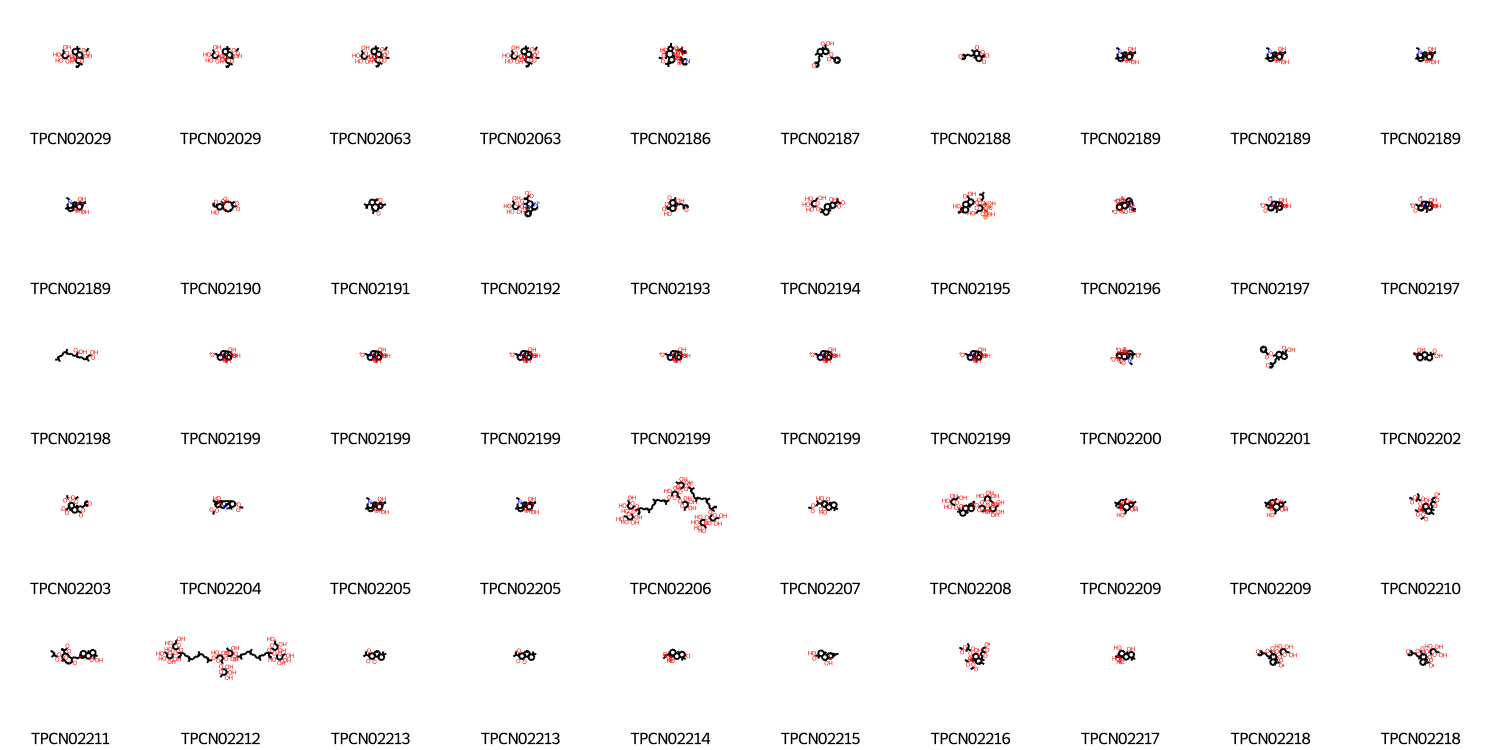

In [6]:
Draw.MolsToGridImage(database_all,molsPerRow=10,subImgSize=(150,150),legends=[mol.GetProp('ID') for mol in database_all])

In [7]:
fps_all=[FingerprintMols.FingerprintMol(mol) for mol in database_all]

### 3. Similarity between test molecules and compound library molecules

In [8]:
size_nps=len(database_nps)
size_all=len(database_all)
hmap=np.empty(shape=(size_nps,size_all))
table=pd.DataFrame()
for index, i in enumerate(fps_nps):
    for jndex, j in enumerate(fps_all):
        similarity=DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[database_nps[index].GetProp('Name'),database_all[jndex].GetProp('ID')]=similarity

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [9]:
table

,TPCN02029,TPCN02063,TPCN02186,TPCN02187,TPCN02188,TPCN02189,TPCN02190,TPCN02191,TPCN02192,TPCN02193,...,TPCN06374,TPCN06375,TPCN06376,TPCN06377,TPCN06378,TPCN06379,TPCN06380,TPCN06381,TPCN06382,TPCN06383
Campathecin,0.384958,0.394007,0.432510,0.374855,0.423834,0.286705,0.519523,0.435045,0.555080,0.356978,...,0.344758,0.400787,0.499000,0.499000,0.337529,0.332948,0.397167,0.378608,0.380656,0.364873
Artemisinin,0.516267,0.517736,0.432367,0.317965,0.385671,0.275105,0.367628,0.375451,0.443713,0.418182,...,0.369792,0.390454,0.502469,0.502469,0.333607,0.473148,0.383096,0.358327,0.361199,0.447863
Parthenolide,0.461183,0.470265,0.413701,0.365581,0.438163,0.311817,0.332163,0.372093,0.374743,0.396336,...,0.429467,0.485955,0.551873,0.551873,0.395326,0.608496,0.506757,0.452562,0.455924,0.513078
Thapsigargin,0.552262,0.568872,0.489933,0.420893,0.510007,0.344211,0.462270,0.454225,0.500000,0.433977,...,0.408589,0.575375,0.566826,0.566826,0.442443,0.536503,0.613432,0.567044,0.526688,0.550243
Paeoniflorin,0.588946,0.593510,0.528536,0.386035,0.396743,0.313383,0.400000,0.373081,0.462185,0.428452,...,0.348428,0.416731,0.476134,0.476134,0.346062,0.478183,0.419657,0.374808,0.363982,0.543783
Andrographolide,0.493671,0.485714,0.472050,0.540166,0.502519,0.487591,0.484270,0.447077,0.460963,0.462567,...,0.571429,0.562914,0.589085,0.589085,0.561782,0.533813,0.575101,0.563611,0.547684,0.568088
Ginkgolide B,0.694519,0.714798,0.528652,0.342165,0.452292,0.315534,0.422481,0.381119,0.460759,0.523023,...,0.369212,0.456505,0.526061,0.526061,0.365279,0.568015,0.439815,0.404744,0.413978,0.552790
Jolkinolide B,0.521244,0.521348,0.467201,0.412995,0.450177,0.344376,0.468987,0.420519,0.494458,0.397015,...,0.391667,0.526955,0.556593,0.556593,0.426267,0.483740,0.623058,0.517857,0.477016,0.558610
Nagilactone E,0.566824,0.581049,0.510189,0.448382,0.551331,0.374306,0.469764,0.424312,0.506550,0.484437,...,0.433375,0.618623,0.599028,0.599028,0.495138,0.624552,0.660774,0.554400,0.537490,0.594010
Triptolide,0.532300,0.537479,0.470782,0.443674,0.483347,0.356250,0.428085,0.431274,0.435747,0.428819,...,0.468354,0.569921,0.622819,0.622819,0.480036,0.616785,0.606393,0.531444,0.509138,0.613270


### 4. Compound pairs with similarity ≥0.95

In [12]:
data_all=[]
for i in range(len(df_nps)):
    for j in range(len(table.T)):
        row=table.index[i]
        columns=table.columns[j]
        similarity=table.iloc[i,j]
        data_all.append((row,columns,similarity))
data_all=pd.DataFrame(data_all,columns=['row','columns','similarity'])
data_all.to_csv('nps_all_similarity.csv',index=False)

In [13]:
similarity_95 = data_all[(data_all['similarity']>=0.95)&(data_all['similarity']<=1)]
similarity_95 = similarity_95.sort_values(by=['row','similarity'], ascending=[True,False])
similarity_95.reset_index(drop=True,inplace=True)
similarity_95.to_csv('nps_all_similarity95.csv',index=False)
similarity_95

,row,columns,similarity
0,Jolkinolide B,TPCN02570,0.982975
1,Limonin,TPCN06180,0.989865
2,Paeoniflorin,TPCN00011,1.000000
3,Paeoniflorin,TPCN00060,1.000000
4,Paeoniflorin,TPCN00486,1.000000
5,Paeoniflorin,TPCN00185,0.997859
6,Paeoniflorin,TPCN00274,0.991489
7,Paeoniflorin,TPCN00320,0.991489
8,Paeoniflorin,TPCN00025,0.970833
9,Paeoniflorin,TPCN00222,0.970833


### 5. Species distribution of similar compounds (example: Paeoniflorin)

In [14]:
df_Paeoniflorin=similarity_95[similarity_95['row']=='Paeoniflorin']
df_Paeoniflorin.reset_index(drop=True,inplace=True)
df_Paeoniflorin.rename(columns={'row':'NPs','columns':'ID'},inplace=True)
df_Paeoniflorin=pd.merge(df_Paeoniflorin,df_all,on=['ID'])
df_Paeoniflorin=df_Paeoniflorin[df_Paeoniflorin['ID']!='TPCN00011']
df_Paeoniflorin.reset_index(drop=True,inplace=True)
df_Paeoniflorin.to_csv('Paeoniflorin.csv',index=False)
df_Paeoniflorin

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,NPs,ID,similarity,Name,CAS Number,Standard_Smiles,Type,Total weight /kg,Piece weight /mg,Content(%),Part,Family,Specie,Reference,DOI,ContentID
0,Paeoniflorin,TPCN00060,1.000000,Isopaeoniflorin,'1579268-45-3',CC12CC3(O)OC(O1)C1(COC(=O)c4ccccc4)C3CC21OC1OC...,Monoterpenoids,5.0,800.0,0.016000,Roots,Paeoniaceae,Paeonia lactiflora,"Fitoterapia, 2008, 79, 117-121.",10.1016/j.fitote.2007.11.001,MP00101
1,Paeoniflorin,TPCN00486,1.000000,Paeonins B,'618911-64-1',CC12CC3(O)OC(O1)C1(COC(=O)c4ccccc4)C3CC21OC1OC...,Monoterpenoids,15.0,33.0,0.000220,Roots,Paeoniaceae,Paeonia emodi,"Chem Pharm Bull (Tokyo), 2003, 51, 252-254.",10.1248/cpb.51.252,MP00620
2,Paeoniflorin,TPCN00185,0.997859,Isomaltopaeoniflorin,'262350-54-9',CC12CC3(O)OC(O1)C1(COC(=O)c4ccccc4)C3CC21OC1OC...,Monoterpenoids,2.0,30.8,0.001540,Roots,Paeoniaceae,Paeonia obovata,"Chem Pharm Bull (Tokyo), 2000, 48, 201-207.",10.1248/cpb.48.201,MP00266
3,Paeoniflorin,TPCN00185,0.997859,Isomaltopaeoniflorin,'262350-54-9',CC12CC3(O)OC(O1)C1(COC(=O)c4ccccc4)C3CC21OC1OC...,Monoterpenoids,29.0,200.3,0.000691,Whole plants,Paeoniaceae,Paeoniae radix,"Fitoterapia, 2019, 138, 104290.",10.1016/j.fitote.2019.104290,MP00267
4,Paeoniflorin,TPCN00274,0.991489,4-O-methyl-paeoniflorin,'219562-62-6',COC12CC3(C)OC(O1)C1(COC(=O)c4ccccc4)C2CC31OC1O...,Monoterpenoids,5.0,37.5,0.000750,Roots,Paeoniaceae,Paeonia lactiflora,"Fitoterapia, 2008, 79, 117-120.",10.1016/j.fitote.2007.11.001,MP00373
5,Paeoniflorin,TPCN00274,0.991489,4-O-methyl-paeoniflorin,'219562-62-6',COC12CC3(C)OC(O1)C1(COC(=O)c4ccccc4)C2CC31OC1O...,Monoterpenoids,1.5,5.0,0.000333,Roots,Paeoniaceae,Paeonia lactiflora,"Fitoterapia, 2016, 108, 55-61.",10.1016/j.fitote.2015.11.011,MP00374
6,Paeoniflorin,TPCN00274,0.991489,4-O-methylpaeoniflorin,'219562-62-6',COC12CC3(C)OC(O1)C1(COC(=O)c4ccccc4)C2CC31OC1O...,Monoterpenoids,15.0,23.0,0.000153,Roots,Paeoniaceae,Paeonia suffruticosa,"Nat Prod Res, 2014, 28, 301-305.",10.1080/14786419.2013.858340,MP00375
7,Paeoniflorin,TPCN00320,0.991489,4-O-ethylpaeoniflorin,'38043-85-5',CCOC12CC3(C)OC(O1)C1(COC(=O)c4ccccc4)C2CC31OC1...,Monoterpenoids,5.0,27.0,0.000540,Roots,Paeoniaceae,Paeonia delavayi,"J Asian Nat Prod Res, 2002, 4, 135-140.",10.1080/10286020290027425,MP00429
8,Paeoniflorin,TPCN00025,0.970833,Oxypaeoniflorin,'39011-91-1',CC12CC3(O)OC(O1)C1(COC(=O)c4ccc(O)cc4)C3CC21OC...,Monoterpenoids,1.0,37.0,0.003700,Roots,Paeoniaceae,Paeonia delavayi,"Fitoterapia, 2007, 78, 76-78.",10.1016/j.fitote.2006.09.014,MP00050
9,Paeoniflorin,TPCN00025,0.970833,Oxypaeoniflorin,'39011-91-1',CC12CC3(O)OC(O1)C1(COC(=O)c4ccc(O)cc4)C3CC21OC...,Monoterpenoids,1.5,3.0,0.000200,Roots,Paeoniaceae,Paeonia lactiflora,"Fitoterapia, 2016, 108, 55-61.",10.1016/j.fitote.2015.11.011,MP00051


In [15]:
# Family Distribution
df_Paeoniflorin_Family=df_Paeoniflorin['Family'].value_counts()
pd.DataFrame(df_Paeoniflorin_Family)

,Family
Paeoniaceae,28


In [16]:
# Species Distribution
df_Paeoniflorin_Species=df_Paeoniflorin['Specie'].value_counts()
df_Paeoniflorin_Species=pd.DataFrame(df_Paeoniflorin_Species)
df_Paeoniflorin_Species

,Specie
Paeonia suffruticosa,10
Paeonia lactiflora,7
Paeonia emodi,3
Paeonia obovata,3
Paeoniae radix,3
Paeonia delavayi,2


Note: Paeoniae radix is replaced by Paeonia lactiflora